In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("movie.csv", sep=",")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
date = data[['date_published']].values

In [4]:
print(date[0][0])
print(len(date))

2002/4/5
42541


In [5]:
data.head(3)

,imdb_title_id,title,original_title,year,date_published,week,month_published,duration,country,language,...,Thriller,Fantasy,Romance,Sci-Fi,Mystery,War,Western,Music,Sport,History
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002/4/5,5,4,118,USA,"English, French",...,0,1,1,0,0,0,0,0,0,0
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,2018/11/2,5,11,122,"France, Iran, USA","English, German",...,0,0,0,0,0,0,0,0,0,0
2,tt0085953,Mo tai,Mo tai,2019,2019/10/22,2,10,84,Hong Kong,Cantonese,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.columns.values.tolist() 

['imdb_title_id',
 'title',
 'original_title',
 'year',
 'date_published',
 'week',
 'month_published',
 'duration',
 'country',
 'language',
 'directors_rating',
 'actors_rating',
 'avg_vote',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'Comedy',
 'Drama',
 'Horror',
 'Musical',
 'Action',
 'Crime',
 'Animation',
 'Adventure',
 'Biography',
 'Family',
 'Thriller',
 'Fantasy',
 'Romance',
 'Sci-Fi',
 'Mystery',
 'War',
 'Western',
 'Music',
 'Sport',
 'History']

In [7]:
daylist = []
for i in range(len(date)):
    day = date[i][0]
    day = day.split('/')
    day = int(day[-1])
    #print(day)
    daylist.append(day)

In [8]:
yearlist = []
for i in range(len(date)):
    year = date[i][0]
    year = year.split('/')
    year = int(year[0])
    yearlist.append(year)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

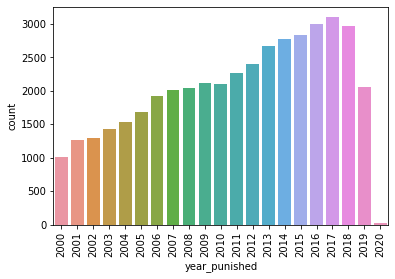

In [9]:
sns.countplot(yearlist)
plt.xlabel('year_punished')
plt.xticks(fontsize=10, color="black", rotation=90)

Text(0.5, 0, 'date_punished')

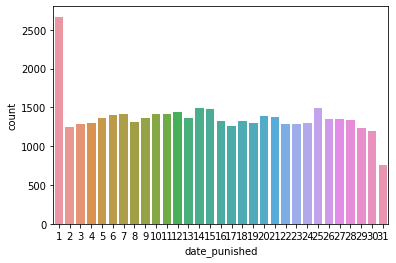

In [10]:
sns.countplot(daylist)
plt.xlabel('date_punished')

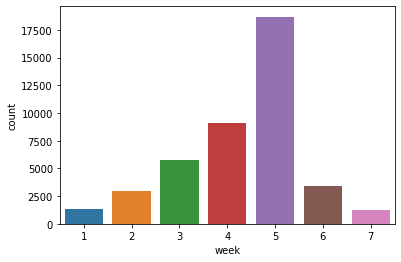

In [11]:
plt.subplot
sns.countplot(data['week'])


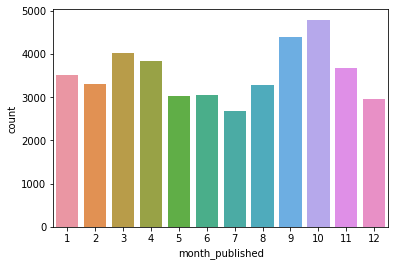

In [12]:
plt.subplot
sns.countplot(data['month_published'])

In [13]:
comedy = data['Comedy']
drama = data['Drama']
comedy.sum()


14431

In [14]:
genre = []

[14431, 23195, 5153, 463, 6392, 4626, 1393, 2956, 1299, 1878, 6334, 1742, 6205, 1598, 2452, 603, 178, 732, 560, 939]


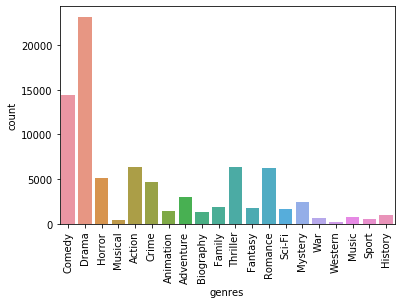

In [15]:
namelist = ['Comedy','Drama','Horror','Musical','Action','Crime','Animation','Adventure','Biography','Family','Thriller','Fantasy',
 'Romance','Sci-Fi','Mystery','War','Western','Music','Sport','History']
type_sum_list = [] 
for name in namelist: 
    type_data = data[name]
    type_sum_list.append(type_data.sum())
print(type_sum_list)
plt.xlabel('genres')
plt.ylabel('count')
plt.xticks(fontsize=10, color="black", rotation=90)
ax = plt.gca()
sns.barplot(namelist,type_sum_list)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

In [16]:
namelist = ['Comedy','Drama','Horror','Musical','Action','Crime','Animation','Adventure','Biography','Family','Thriller','Fantasy',
 'Romance','Sci-Fi','Mystery','War','Western','Music','Sport','History']
rate_list = [] 
for name in namelist: 
    type_list = data[name].values
    rate = type_list.dot(data['avg_vote'].values)
    n_nonzero = len(np.nonzero(type_list)[0]) 
    rate_list.append(rate/n_nonzero)

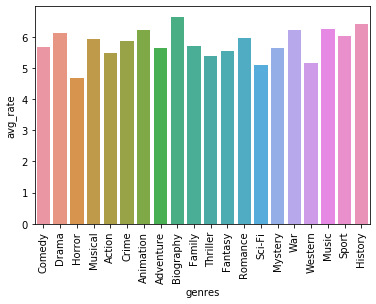

In [17]:
ax = plt.gca()
sns.barplot(namelist,rate_list)
plt.xlabel('genres')
plt.ylabel('avg_rate')
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

In [18]:
import re
def nan_str2int(inputlist):
    outputlist = []
    for y in inputlist:
        #y = inputlist[i]
        if isinstance(y,str):
            y = re.sub("\D", "", y)
            outputlist.append(int(float(y)))
        else:
            outputlist.append(y)
            
            
    return outputlist
namelist = ['Comedy','Drama','Horror','Musical','Action','Crime','Animation','Adventure','Biography','Family','Thriller','Fantasy',
 'Romance','Sci-Fi','Mystery','War','Western','Music','Sport','History']
usa_gross_income_list = [] 
for name in namelist: 
    type_list = data[name].values
    
    usa_gross_income = data["worlwide_gross_income"].values
    #print(np.isnan(usa_gross_income[2]))
    #print(usa_gross_income[:1000])
    usa_gross_income = nan_str2int(usa_gross_income)
    
    type_income_list = type_list*usa_gross_income #a = [1 0 0 1], b = [3 4 5 6] a*b = [3 0 0 6]

    type_mean_income = np.nanmean(type_income_list) #np.nanmean(ab) = 非NaN的数值的和

    usa_gross_income_list.append(type_mean_income)
print(usa_gross_income_list)

[8179487.17897073, 7658904.417779825, 1258443.930195553, 226264.54172773333, 9757279.606088523, 2315444.990578284, 3277680.8420082913, 10102877.14279134, 997890.7181860056, 2127755.1679159165, 3180625.6535320967, 3077503.0992420753, 2320064.9267199864, 3141916.653741468, 1377854.3915665173, 178334.894518655, 57631.479376910516, 382534.1114274947, 310062.466605251, 568785.0203090323]


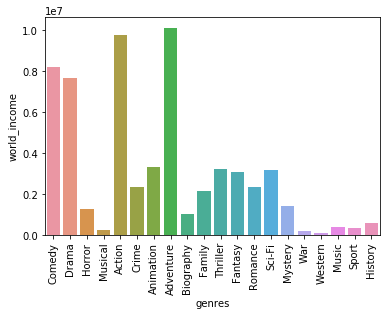

In [19]:
ax = plt.gca()
sns.barplot(namelist,usa_gross_income_list)
plt.xlabel('genres')
plt.ylabel('world_income')
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

In [20]:
namelist = ['Comedy','Drama','Horror','Musical','Action','Crime','Animation','Adventure','Biography','Family','Thriller','Fantasy',
 'Romance','Sci-Fi','Mystery','War','Western','Music','Sport','History']
rate_list = [] 
for name in namelist: 
    type_list = data[name].values
    rate = type_list.dot(data['avg_vote'].values)
    
    n_nonzero = len(np.nonzero(type_list)[0])
    
    rate_list.append(rate/n_nonzero)
    
print(rate_list)

[5.680548818515694, 6.125850398792844, 4.670230933436833, 5.931749460043196, 5.487108886107635, 5.864159100734976, 6.226489590811199, 5.639073071718538, 6.644803695150114, 5.709318423855165, 5.378102305020524, 5.527841561423651, 5.942610797743756, 5.078035043804756, 5.6489396411092985, 6.228524046434495, 5.157303370786517, 6.248360655737705, 6.034999999999999, 6.403727369542066]
